In [1]:
from IPython.core.display import HTML
css_file = 'pynoddy.css'
HTML(open(css_file, "r").read())

In [2]:
%matplotlib inline

In [4]:
#import the ususal libraries + the pynoddy UncertaintyAnalysis class

import sys, os, pynoddy
from pynoddy.experiment.UncertaintyAnalysis import UncertaintyAnalysis

# adjust some settings for matplotlib
from matplotlib import rcParams
# print rcParams
rcParams['font.size'] = 15

# determine path of repository to set paths corretly below
repo_path = os.path.realpath('../..')
import pynoddy.history
import pynoddy.experiment.UncertaintyAnalysis
rcParams.update({'font.size': 20})

print "Success. Ignore? warnings here - scipy is funny sometimes."

Success. Ignore? warnings here - scipy is funny sometimes.


**The Gippsland Basin Model**

In this example we will apply the UncertaintyAnalysis class we have been playing with in the previous example to a 'realistic' (though highly simplified) geological model of the Gippsland Basin, a petroleum field south of Victoria, Australia. The model has been included as part of the PyNoddy directory, and can be found at pynoddy/examples/GBasin_Ve1_V4.his

In [5]:
reload(pynoddy.history)
reload(pynoddy.output)
reload(pynoddy.experiment.UncertaintyAnalysis)
reload(pynoddy)

# the model itself is now part of the repository, in the examples directory:
history_file = os.path.join(repo_path, "examples/GBasin_Ve1_V4.his")

While we could hard-code parameter variations here, it is much easier to store our statistical information in a csv file, so we load that instead. This file accompanies the GBasin_Ve1_V4 model in the pynoddy directory.

In [6]:
params = os.path.join(repo_path,"examples/gipps_params.csv")

Now we have all the information required to perform a Monte-Carlo based uncertainty analysis. In this example we will generate 20 model realisations and use them to estimate the information entropy of each voxel in the model, and hence visualise uncertainty. It is worth noting that in reality we would need to produce several thousand model realisations in order to adequately sample the model space, however for convinience we only generate a small number of models here.

In [7]:
ua = UncertaintyAnalysis(history_file,params)
ua.estimate_uncertainty(20,verbose=False)

A few utility functions for visualising uncertainty have been included in the UncertaintyAnalysis class, and can be used to gain an understanding of the most uncertain parts of the Gippsland Basin. The probabability voxets for each lithology can also be accessed using *ua.p_block[lithology_id]*, and the information entropy voxset accessed using *ua.e_block*.

Note that the Gippsland Basin model has been computed with a vertical exagguration of 3, in order to highlight vertical structure.

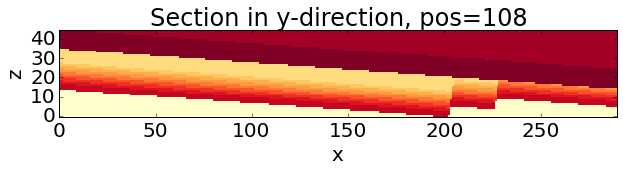

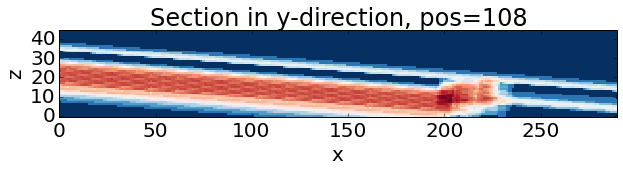

In [12]:
ua.plot_section(direction='y',data=ua.block)
ua.plot_entropy(direction='y')

It is immediately apparent (and not particularly surprising) that uncertainty in the Gippsland Basin model is concentrated around the thin (but economically interesting) formations comprising the La Trobe and Strzelecki Groups. The faults in the model also contribute to this uncertainty, though not by a huge amount.

It is also possible (and useful!) to export the uncertainty information to .vtk format for 3D analysis in software such as ParaView. This can be done as follows:

In [18]:
ua.extent_x = 29000
ua.extent_y = 21600
ua.extent_z = 4500

output_path = os.path.join(repo_path,"sandbox/GBasin_Uncertainty")
ua.export_to_vtk(vtk_filename=output_path,data=ua.e_block)

The resulting vtr file can (in the sandbox directory) can now be loaded and properly analysed in a 3D visualisation package such as ParaView. 

<img src="15-Gippsland-Basin-Uncertainty_files/3D-render.png">